<a href="https://colab.research.google.com/github/JamesHorrex/SS_AI_TI/blob/master/SS_AITrader_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-l2eaa8n8
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-l2eaa8n8
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0dfd9739e4bdcce166dc6326afcde41af9a5f8641_-cp36-none-any.whl size=119874 sha256=c910c760e5a75ebb44da5f4dae1c68bea10280095514686badd232e14f7f6d42
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhby9i8h/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/SS_AITrader/df_AAPL_20drtn_features.csv')

In [ ]:
df.head()

,timestamp,rsi_10,rsi_15,rsi_20,rsi_40,wr_10,wr_15,wr_20,wr_40,mfi_10,mfi_15,mfi_20,mfi_40,roc_1,roc_3,roc_5,roc_10,roc_20,trix_10,trix_15,trix_20,trix_40,macd10,macd15,macd20,macd40,cci_5,cci_10,cci_15,cci_25,kst_20,kst_40,ibr,bb_h10,bb_l10,bb_h15,bb_l15,bb_h20,bb_l20,bb_h40,bb_l40,realised_vol_10,realised_vol_change_5d_10,realised_vol_20,realised_vol_change_5d_20,realised_vol_40,realised_vol_change_5d_40,vix_level,vix_1d_change,vix_5d_change,forcei_10,forcei_15,forcei_20,forcei_40,cmf_10,cmf_15,cmf_20,cmf_40,volume_delta,curve,curve_shift,curve_shift_5d,dollarix_1d_change,dollarix_5d_change,labels
0,2008-03-06,44.725483,45.288423,43.397402,31.801612,-67.243397,-67.243397,-67.243397,-91.625984,42.103071,36.782105,40.872715,40.265565,-2.859668,-0.657185,-6.912472,-0.501893,-0.877047,-0.423938,-0.822983,-0.924744,-0.528792,-0.838922,-0.838922,-0.838922,-0.838922,-38.235939,11.447145,-6.844883,-43.010359,-144.122980,-190.859863,0.017938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474224,0.058966,0.438498,-0.015019,0.521149,-0.016969,27.549999,2.949999,4.019999,-4.789842e+07,-4.789842e+07,-4.789842e+07,-4.789842e+07,0.204173,0.037507,0.105674,0.018727,0.206135,2.257,0.044,0.397,-0.480003,-0.720001,1.0
1,2008-03-07,51.430780,41.400554,50.270278,33.778933,-59.367559,-59.367559,-59.367559,-89.612576,42.889028,31.323528,42.207119,37.130063,1.091532,-1.901782,-2.215653,2.335507,0.833055,-0.384334,-0.779360,-0.901019,-0.536290,-0.794723,-0.794723,-0.794723,-0.794723,-101.912554,-39.004505,-45.300214,-69.255935,-130.900357,-173.772265,0.814248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466893,0.013833,0.439531,-0.022512,0.503650,-0.038749,27.490000,-0.059999,0.949999,-1.259658e+07,-1.259658e+07,-1.259658e+07,-1.259658e+07,0.253432,0.112950,0.134901,0.001697,-0.165051,2.141,-0.116,0.392,0.029999,-0.680000,1.0
2,2008-03-10,49.910916,40.471711,48.618273,29.440970,-74.641977,-74.641977,-74.641977,-93.357293,43.592380,31.221896,37.426439,34.442237,-2.094063,-3.855734,-1.675835,-0.041758,-4.614280,-0.362241,-0.740905,-0.878028,-0.543300,-0.780212,-0.780212,-0.780212,-0.780212,-100.944593,-66.046458,-54.785720,-77.488107,-120.783737,-158.940515,0.078241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481781,0.023041,0.426451,-0.041834,0.504517,-0.038564,29.379999,1.889999,3.099998,-3.886128e+07,-3.886128e+07,-3.886128e+07,-3.886128e+07,0.131460,0.098183,0.055019,-0.011117,-0.187632,2.138,-0.003,0.239,-0.040001,-0.709999,1.0
3,2008-03-11,60.988149,53.481092,51.757967,33.373481,-34.154886,-28.937899,-28.937899,-81.384798,52.958707,36.893865,37.251868,36.620677,6.399868,5.308856,2.190667,6.882082,-1.622244,-0.313166,-0.695137,-0.850948,-0.549300,-0.672658,-0.672658,-0.672658,-0.672658,118.318319,58.863804,87.403788,36.915852,-107.320736,-140.447608,0.976279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575665,0.112045,0.473230,-0.003161,0.534008,0.010853,26.360001,-3.019999,0.840000,8.023304e+07,8.023304e+07,8.023304e+07,8.023304e+07,0.180828,0.189022,0.069677,0.014668,0.164422,2.156,0.018,0.172,0.290001,-0.380005,1.0
4,2008-03-12,58.738539,54.141327,47.170826,34.183784,-43.450691,-36.813817,-36.813817,-83.396047,51.692191,42.103219,41.870405,36.115937,-1.036516,3.092030,1.237043,2.496750,0.937050,-0.257739,-0.646812,-0.821497,-0.554424,-0.595769,-0.595769,-0.595769,-0.595769,99.615577,70.593466,102.075796,70.634166,-96.028130,-124.576467,0.245016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.563885,0.104261,0.456668,-0.016382,0.522823,-0.000522,27.219999,0.859999,2.619999,3.683733e+07,3.683733e+07,3.683733e+07,3.683733e+07,0.040032,0.138869,0.081130,-0.007911,-0.089621,2.043,-0.113,-0.170,-0.879997,-1.080002,1.0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
from_date='2010-01-01'
to_date='2020-01-01'

In [ ]:
df = df[pd.to_datetime(from_date) < df['timestamp'] ]
df = df[pd.to_datetime(to_date) > df['timestamp'] ]


In [ ]:
df.head()

,timestamp,rsi_10,rsi_15,rsi_20,rsi_40,wr_10,wr_15,wr_20,wr_40,mfi_10,mfi_15,mfi_20,mfi_40,roc_1,roc_3,roc_5,roc_10,roc_20,trix_10,trix_15,trix_20,trix_40,macd10,macd15,macd20,macd40,cci_5,cci_10,cci_15,cci_25,kst_20,kst_40,ibr,bb_h10,bb_l10,bb_h15,bb_l15,bb_h20,bb_l20,bb_h40,bb_l40,realised_vol_10,realised_vol_change_5d_10,realised_vol_20,realised_vol_change_5d_20,realised_vol_40,realised_vol_change_5d_40,vix_level,vix_1d_change,vix_5d_change,forcei_10,forcei_15,forcei_20,forcei_40,cmf_10,cmf_15,cmf_20,cmf_40,volume_delta,curve,curve_shift,curve_shift_5d,dollarix_1d_change,dollarix_5d_change,labels
445,2010-01-05,88.367824,72.305248,65.437317,61.827652,-6.074306,-4.920706,-4.496475,-4.496475,90.552058,82.517437,70.113765,54.681859,0.172887,1.294649,1.309010,9.696563,10.893848,0.381470,0.161290,0.111900,0.212888,0.612500,0.612500,0.612500,0.612500,100.057346,87.659454,99.266269,149.667583,40.505972,43.459751,0.482906,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.198066,-0.037521,0.259985,-0.008924,0.248800,-0.019844,19.350000,-0.690001,-0.580000,2.268734e+07,2.268734e+07,2.268734e+07,2.268734e+07,0.183806,0.173105,0.034850,-0.019948,0.219098,3.695,-0.091,-0.092,0.090004,-0.009995,0.0
446,2010-01-06,75.628290,69.040653,64.944977,58.430716,-27.288830,-18.788130,-17.181112,-17.168342,78.632316,74.685569,70.778321,52.343000,-1.590633,0.113886,0.894304,6.426877,11.653875,0.405888,0.188053,0.127192,0.211746,0.607078,0.607078,0.607078,0.607078,-10.681366,52.016125,70.258455,111.392651,47.368458,50.208017,0.049105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232091,-0.023224,0.251391,-0.021757,0.253105,0.004323,19.160000,-0.190001,-0.850000,-7.290159e+06,-7.290159e+06,-7.290159e+06,-7.290159e+06,0.046955,0.044311,0.049710,-0.051739,-0.082646,3.763,0.068,0.049,-0.130005,-0.340004,0.0
447,2010-01-07,72.931718,66.953391,69.894380,58.119061,-33.897141,-20.374123,-19.818023,-18.617602,69.398102,73.737302,71.893206,49.665130,-0.184858,-1.602728,-0.500849,5.100815,10.907459,0.412891,0.209178,0.140849,0.210762,0.591468,0.591468,0.591468,0.591468,-105.978017,3.950625,47.641523,84.642377,54.074143,56.112235,0.518642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234007,0.004580,0.252793,-0.014636,0.237181,-0.012701,19.059999,-0.100000,-0.900000,-7.075333e+06,-7.075333e+06,-7.075333e+06,-7.075333e+06,0.009382,0.080264,0.078308,-0.074345,-0.135882,3.777,0.014,0.033,0.420006,0.000000,0.0
448,2010-01-08,72.459136,73.145540,70.224475,55.599597,-29.493376,-14.680727,-14.680727,-13.415053,70.124687,74.184871,71.318139,49.834923,0.664833,-1.119502,0.593177,4.888668,7.168859,0.411419,0.226545,0.153422,0.209982,0.588451,0.588451,0.588451,0.588451,-69.701813,-14.902849,46.645104,80.578394,58.635696,60.046186,0.993197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233352,-0.004696,0.213266,-0.054371,0.237037,-0.013071,18.129999,-0.930000,-3.550001,2.743320e+06,2.743320e+06,2.743320e+06,2.743320e+06,0.053678,0.165041,0.061123,-0.050917,-0.061871,3.768,-0.009,-0.025,-0.440002,-0.389999,0.0
449,2010-01-11,64.778196,68.808323,62.509711,53.742449,-75.274686,-23.836424,-22.285459,-20.364156,60.538809,73.089877,66.272417,47.408533,-0.882160,-0.407638,-1.822343,0.511863,6.964316,0.397349,0.238337,0.163904,0.209238,0.558072,0.558072,0.558072,0.558072,-64.516204,-69.147829,35.063293,69.487632,61.721647,62.145879,0.364835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.173768,-0.024195,0.214603,-0.056103,0.238365,-0.012978,17.549999,-0.580000,-2.490002,-8.461247e+06,-8.461247e+06,-8.461247e+06,-8.461247e+06,-0.063321,0.176618,0.091103,-0.054982,0.032660,3.793,0.025,0.007,-0.470001,-0.529999,0.0


In [ ]:
df.tail()

,timestamp,rsi_10,rsi_15,rsi_20,rsi_40,wr_10,wr_15,wr_20,wr_40,mfi_10,mfi_15,mfi_20,mfi_40,roc_1,roc_3,roc_5,roc_10,roc_20,trix_10,trix_15,trix_20,trix_40,macd10,macd15,macd20,macd40,cci_5,cci_10,cci_15,cci_25,kst_20,kst_40,ibr,bb_h10,bb_l10,bb_h15,bb_l15,bb_h20,bb_l20,bb_h40,bb_l40,realised_vol_10,realised_vol_change_5d_10,realised_vol_20,realised_vol_change_5d_20,realised_vol_40,realised_vol_change_5d_40,vix_level,vix_1d_change,vix_5d_change,forcei_10,forcei_15,forcei_20,forcei_40,cmf_10,cmf_15,cmf_20,cmf_40,volume_delta,curve,curve_shift,curve_shift_5d,dollarix_1d_change,dollarix_5d_change,labels
2890,2019-12-20,78.735491,65.010611,66.180502,69.198691,-18.094663,-12.177516,-12.177516,-7.072024,73.702744,68.916077,66.352914,65.122857,-0.207123,-0.345922,1.559153,3.224857,6.652415,0.326835,0.302989,0.329628,0.328839,6.195519,6.195519,6.195519,6.195519,42.707093,69.403730,96.888476,146.375987,63.179020,74.371315,0.215160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139878,-0.066587,0.173093,-0.004715,0.175161,-0.001096,12.51,0.010000,-0.120000,4.056239e+06,4.056239e+06,4.056239e+06,4.056239e+06,0.072310,0.155083,0.182715,0.266410,1.805533,0.389,0.014,0.093,0.290001,0.540001,1.0
2891,2019-12-23,78.891586,69.968958,70.694496,70.544402,-1.359433,-0.894135,-0.894135,-0.532028,82.950658,74.297802,69.884821,65.435305,1.631834,1.522846,1.479316,6.398916,8.488044,0.343601,0.310142,0.330798,0.329567,6.466477,6.466477,6.466477,6.466477,166.666667,89.139556,105.437822,154.751715,66.262251,77.083816,0.935567,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.116204,-0.083741,0.178296,-0.004133,0.176743,-0.002568,12.61,0.099999,0.469999,4.016150e+07,4.016150e+07,4.016150e+07,4.016150e+07,0.173501,0.241242,0.225660,0.269163,-0.642827,0.415,0.026,0.048,-0.029999,0.610001,1.0
2892,2019-12-27,93.694404,86.556836,74.245496,74.914710,-18.099010,-14.349669,-11.066917,-7.353223,82.972965,81.070483,75.283200,71.212495,-0.037948,2.042249,3.492607,6.756059,8.198922,0.403877,0.340203,0.340911,0.332680,7.428110,7.428110,7.428110,7.428110,107.332453,161.531864,139.078457,157.106247,78.235472,88.207927,0.287178,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.141862,-0.015501,0.173326,-0.000964,0.167141,-0.007504,13.43,0.780001,0.850000,4.022156e+07,4.022156e+07,4.022156e+07,4.022156e+07,0.084929,0.176060,0.190868,0.293552,0.570706,0.356,-0.014,-0.019,-0.669998,-0.490005,1.0
2893,2019-12-30,94.079459,85.837210,73.372957,75.406081,-14.420327,-8.430875,-6.502157,-5.467557,71.552024,73.391312,69.821091,67.620207,0.593513,2.550392,4.322927,5.949480,9.081380,0.425277,0.352645,0.346408,0.334109,7.716994,7.716994,7.716994,7.716994,61.580931,113.076839,119.192149,133.205472,80.459319,90.024301,0.843372,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.136387,-0.003491,0.171861,-0.001231,0.160538,-0.014623,14.82,1.389999,2.320000,4.747078e+07,4.747078e+07,4.747078e+07,4.747078e+07,0.064077,0.177603,0.220169,0.285695,-0.014710,0.405,0.049,0.016,-0.180000,-0.680000,1.0
2894,2019-12-31,93.661579,84.577224,75.291982,74.505114,-2.076621,-1.138410,-0.849277,-0.829034,71.040148,79.901033,73.968497,67.357373,0.730655,1.290052,3.397885,4.927467,11.163685,0.446134,0.365766,0.352735,0.335737,8.025299,8.025299,8.025299,8.025299,95.389806,115.237106,132.719533,136.566492,84.022935,92.642967,0.992789,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.121756,0.005552,0.161330,-0.016967,0.148111,-0.028633,13.78,-1.040000,1.270000,4.954022e+07,4.954022e+07,4.954022e+07,4.954022e+07,0.092802,0.257884,0.291867,0.277636,-0.300517,0.414,0.009,-0.001,-0.349998,-1.320000,1.0


In [ ]:
df.drop(['timestamp'], inplace=True, axis=1)

In [ ]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [ ]:
train_dataset.head()

,rsi_10,rsi_15,rsi_20,rsi_40,wr_10,wr_15,wr_20,wr_40,mfi_10,mfi_15,mfi_20,mfi_40,roc_1,roc_3,roc_5,roc_10,roc_20,trix_10,trix_15,trix_20,trix_40,macd10,macd15,macd20,macd40,cci_5,cci_10,cci_15,cci_25,kst_20,kst_40,ibr,bb_h10,bb_l10,bb_h15,bb_l15,bb_h20,bb_l20,bb_h40,bb_l40,realised_vol_10,realised_vol_change_5d_10,realised_vol_20,realised_vol_change_5d_20,realised_vol_40,realised_vol_change_5d_40,vix_level,vix_1d_change,vix_5d_change,forcei_10,forcei_15,forcei_20,forcei_40,cmf_10,cmf_15,cmf_20,cmf_40,volume_delta,curve,curve_shift,curve_shift_5d,dollarix_1d_change,dollarix_5d_change,labels
1856,40.829009,41.259826,50.722968,47.315854,-63.006403,-63.006403,-63.778700,-32.904608,57.278142,54.510659,59.560563,51.131427,0.362386,0.435173,-1.476346,-3.845153,1.381900,-0.081764,-0.065951,-0.125976,-0.156473,-0.956107,-0.956107,-0.956107,-0.956107,77.667135,-48.685558,-81.733492,-69.538153,3.346187,-5.044278,0.743477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220827,0.017705,0.246839,-0.073357,0.380938,-0.003582,19.540001,-1.400000,-8.089998,-2.974513e+06,-2.974513e+06,-2.974513e+06,-2.974513e+06,0.113076,0.160577,0.140154,0.057825,-0.102639,2.048,6.700003e-02,-0.034,0.279999,0.080002,1.0
2747,22.982155,35.361800,36.764136,47.671938,-74.780495,-81.958300,-81.958300,-81.958300,34.608449,38.782428,37.595993,54.279640,1.917095,-1.830806,-1.091910,-8.015377,-10.063616,-0.381918,-0.039310,0.136308,0.207336,-3.107506,-3.107506,-3.107506,-3.107506,-31.125992,-60.150848,-77.874496,-123.441700,-20.384354,-12.933463,0.575760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372088,-0.079758,0.348089,0.010505,0.269047,-0.006277,14.950000,-1.360000,-3.110000,-4.096090e+07,-4.096090e+07,-4.096090e+07,-4.096090e+07,0.201955,0.089460,0.012077,0.138695,-0.265395,0.096,2.384186e-07,0.030,0.129997,0.529999,0.0
898,47.708693,61.357573,54.922810,54.236715,-60.500737,-44.854616,-30.016565,-30.016565,43.301794,60.597287,54.381224,53.737267,0.064242,1.805057,3.074804,-4.040285,6.196893,0.148526,0.140425,0.134686,0.147802,0.511535,0.511535,0.511535,0.511535,70.706197,-0.033502,5.669321,49.337169,33.573485,40.359324,0.635416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.365067,-0.100823,0.374331,0.008563,0.310031,0.003575,24.530001,-0.929998,-6.789999,7.724395e+06,7.724395e+06,7.724395e+06,7.724395e+06,-0.182428,0.034681,0.031154,0.018326,-0.347350,2.296,-8.899999e-02,0.108,0.219994,-1.210007,0.0
765,55.349495,41.694445,51.107991,51.238069,-13.051967,-29.207766,-34.865336,-46.398454,33.724399,29.184322,36.899697,43.951887,1.346715,4.565446,1.868328,1.292748,0.949319,-0.183672,-0.134862,-0.081874,0.076540,-0.392873,-0.392873,-0.392873,-0.392873,138.700307,176.514420,84.288142,44.982943,-29.793031,-33.357387,0.214119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198409,0.075919,0.178555,-0.001395,0.225607,-0.012420,15.070000,-0.760000,-1.850000,6.212072e+07,6.212072e+07,6.212072e+07,6.212072e+07,-0.033109,-0.113261,-0.017334,0.039916,0.670726,3.345,4.400015e-02,-0.071,-0.659996,-0.610001,1.0
1100,81.548639,80.857706,83.315740,69.736055,-9.770381,-8.138662,-6.437640,-4.681181,84.920873,80.305175,80.684421,66.392220,1.878712,1.018132,1.583096,7.250790,13.553932,0.487847,0.336496,0.252467,0.136246,2.560204,2.560204,2.560204,2.560204,166.666667,115.551567,128.182091,152.538976,89.965638,93.266001,0.291947,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.213155,0.057575,0.183087,-0.057067,0.211622,-0.003969,16.350000,1.170000,2.330000,8.319305e+07,8.319305e+07,8.319305e+07,8.319305e+07,0.165947,0.213243,0.241312,0.208993,-0.023625,1.554,-3.399992e-02,-0.175,0.070007,-0.799995,0.0


In [ ]:
train_labels = train_dataset.pop('labels')
test_labels = test_dataset.pop('labels')

In [ ]:
train_labels.head()

1856    1.0
2747    1.0
898     0.0
765     0.0
1100    0.0
Name: labels, dtype: float64

In [ ]:
from sklearn.utils import compute_class_weight
def get_sample_weights(y):
      y = y.astype(int)  # compute_class_weight needs int labels
      class_weights = compute_class_weight('balanced', np.unique(y), y)

      print("real class weights are {}".format(class_weights), np.unique(y))
      print("value_counts", np.unique(y, return_counts=True))
      sample_weights = y.copy().astype(float)
      for i in np.unique(y):
          sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
            # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

      return sample_weights


In [ ]:
get_sample_weights(train_labels)

real class weights are [1.39204545 0.78025478] [0 1]
value_counts (array([0, 1]), array([ 704, 1256]))


1856    0.780255
2747    0.780255
898     1.392045
765     1.392045
1100    1.392045
          ...   
2051    0.780255
1301    0.780255
2192    0.780255
1640    1.392045
2882    0.780255
Name: labels, Length: 1960, dtype: float64

In [ ]:
SAMPLE_WEIGHT=get_sample_weights(train_labels)

real class weights are [1.39204545 0.78025478] [0 1]
value_counts (array([0, 1]), array([ 704, 1256]))


In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from operator import itemgetter

k=20
list_features = list(normed_train_data.columns)
select_k_best = SelectKBest(f_classif, k=k)
select_k_best.fit(normed_train_data, train_labels)
selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)

selected_features_anova

('rsi_10',
 'rsi_15',
 'rsi_20',
 'wr_15',
 'mfi_15',
 'macd10',
 'macd15',
 'macd20',
 'macd40',
 'cci_5',
 'cci_15',
 'cci_25',
 'realised_vol_10',
 'realised_vol_20',
 'realised_vol_40',
 'realised_vol_change_5d_40',
 'cmf_10',
 'cmf_15',
 'cmf_20',
 'curve')

In [ ]:
select_k_best = SelectKBest(mutual_info_classif, k=k)
select_k_best.fit(normed_train_data, train_labels)
selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
selected_features_mic

('rsi_40',
 'mfi_10',
 'mfi_15',
 'mfi_40',
 'trix_20',
 'trix_40',
 'macd10',
 'macd15',
 'macd20',
 'macd40',
 'cci_15',
 'kst_20',
 'kst_40',
 'realised_vol_10',
 'realised_vol_20',
 'realised_vol_40',
 'vix_level',
 'vix_5d_change',
 'cmf_40',
 'curve')

In [ ]:
list_features = list(normed_train_data.columns)
feat_idx = []
for c in selected_features_mic:
      feat_idx.append(list_features.index(c))

feat_idx = sorted(feat_idx)
X_train_new=normed_train_data.iloc[:, feat_idx]
X_test_new=normed_test_data.iloc[:, feat_idx]
#kbest=SelectKBest(f_classif, k=10)
#X_train_new = kbest.fit_transform(normed_train_data, train_labels)
#X_test_new = kbest.transform(normed_test_data)

X_test_new.shape
X_test_new.head()

,rsi_40,mfi_10,mfi_15,mfi_40,trix_20,trix_40,macd10,macd15,macd20,macd40,cci_15,kst_20,kst_40,realised_vol_10,realised_vol_20,realised_vol_40,vix_level,vix_5d_change,cmf_40,curve
445,0.525686,1.815425,1.715812,0.029726,0.075584,0.789915,-0.058239,-0.058239,-0.058239,-0.058239,0.678477,0.216089,0.218494,-0.321255,0.216724,0.027222,0.445087,-0.194993,-0.514521,2.013397
448,-0.023971,0.771639,1.196587,-0.435061,0.260722,0.771377,-0.068553,-0.068553,-0.068553,-0.068553,0.191844,0.491800,0.459927,0.004252,-0.307645,-0.135054,0.226020,-1.176824,-0.793084,2.093196
452,-0.293386,0.182331,0.665162,-0.665204,0.387800,0.749877,-0.127749,-0.127749,-0.127749,-0.127749,-0.382907,0.571737,0.482438,-0.609324,-0.335868,-0.100179,0.136238,-0.475989,-0.729970,2.006838
469,-0.570084,-0.958587,-0.662174,-0.029290,-0.465161,0.369428,-0.499308,-0.499308,-0.499308,-0.499308,-0.705230,-0.920865,-0.802904,1.371881,1.726162,0.980169,1.639183,1.490979,-0.585252,1.836308
470,-0.562874,-0.605931,-0.604224,-0.018000,-0.539147,0.328193,-0.499883,-0.499883,-0.499883,-0.499883,-0.737323,-1.031902,-0.907873,1.297590,1.713997,0.972871,1.531445,1.252959,-0.552093,1.902990


In [ ]:
def build_model(hidden_dim,dropout=0.5):
    ## input layer
    inputs=tf.keras.Input(shape=(X_train_new.shape[1],))


    h1= tf.keras.layers.Dense(units=hidden_dim,activation='relu')(inputs)
    h2= tf.keras.layers.Dropout(dropout)(h1)
    h3= tf.keras.layers.Dense(units=hidden_dim*2,activation='relu')(h2)
    h4= tf.keras.layers.Dropout(dropout)(h3)
    h5= tf.keras.layers.Dense(units=hidden_dim*2,activation='relu')(h4)
    h6= tf.keras.layers.Dropout(dropout)(h5)
    h7= tf.keras.layers.Dense(units=hidden_dim,activation='relu')(h6)

    ##output
    outputs=tf.keras.layers.Dense(units=2,activation='softmax')(h7)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
criterion = tf.keras.losses.sparse_categorical_crossentropy

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model = build_model(hidden_dim=64)

model.compile(optimizer=optimizer,loss=criterion,metrics=['accuracy'])

In [ ]:
example_batch = X_train_new[:10]
example_result = model.predict(example_batch)
example_result

array([[0.4760005 , 0.52399945],
       [0.43054202, 0.56945795],
       [0.44352984, 0.5564702 ],
       [0.47233903, 0.52766097],
       [0.40595227, 0.5940477 ],
       [0.46554428, 0.5344557 ],
       [0.47512266, 0.5248773 ],
       [0.45981833, 0.5401817 ],
       [0.4956476 , 0.5043524 ],
       [0.45506066, 0.54493934]], dtype=float32)

In [ ]:
EPOCHS=200
BATCH_SIZE=20

history = model.fit(
  X_train_new, train_labels,
  epochs=EPOCHS, batch_size=BATCH_SIZE ,sample_weight=SAMPLE_WEIGHT,shuffle=True,validation_split = 0.2, verbose=1,
  callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/200
75/79 [===========================>..] - ETA: 0s - loss: 0.7279 - accuracy: 0.4947
Epoch: 0, accuracy:0.4923,  loss:0.7298,  val_accuracy:0.4464,  val_loss:0.6840,  
79/79 [==============================] - 1s 7ms/step - loss: 0.7298 - accuracy: 0.4923 - val_loss: 0.6840 - val_accuracy: 0.4464
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.7132 - accuracy: 0.4815 - val_loss: 0.6821 - val_accuracy: 0.4464
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.7019 - accuracy: 0.5236 - val_loss: 0.6810 - val_accuracy: 0.4898
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.5497 - val_loss: 0.6792 - val_accuracy: 0.5102
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5357 - val_loss: 0.6708 - val_accuracy: 0.5714
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6878 - accuracy: 0.5446 - val_loss: 0.6663 - val_accur

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.346867,0.855230,0.416171,0.793367,195
196,0.329919,0.860332,0.418169,0.775510,196
197,0.363506,0.843112,0.430488,0.778061,197
198,0.342190,0.852679,0.431234,0.790816,198
199,0.347882,0.845026,0.432464,0.775510,199


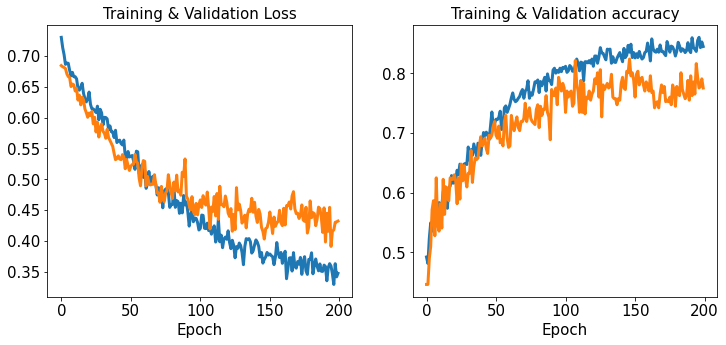

In [ ]:
import matplotlib.pyplot as plt

hist=history.history

fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)
ax.plot(hist['loss'],lw=3)
ax.plot(hist['val_loss'],lw=3)
ax.set_title('Training & Validation Loss',size=15)
ax.set_xlabel('Epoch',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax=fig.add_subplot(1,2,2)
ax.plot(hist['accuracy'],lw=3)
ax.plot(hist['val_accuracy'],lw=3)
ax.set_title('Training & Validation accuracy',size=15)
ax.set_xlabel('Epoch',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()




In [ ]:
!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394116 sha256=a0f86cafc8d2d87c3226574d6e57aa1e7d4381fcc214924ffcc0284d33e88ac0
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import shap

explainer = shap.DeepExplainer(model, np.array(X_train_new))

In [ ]:
shap_values  = explainer.shap_values(np.array(X_test_new))

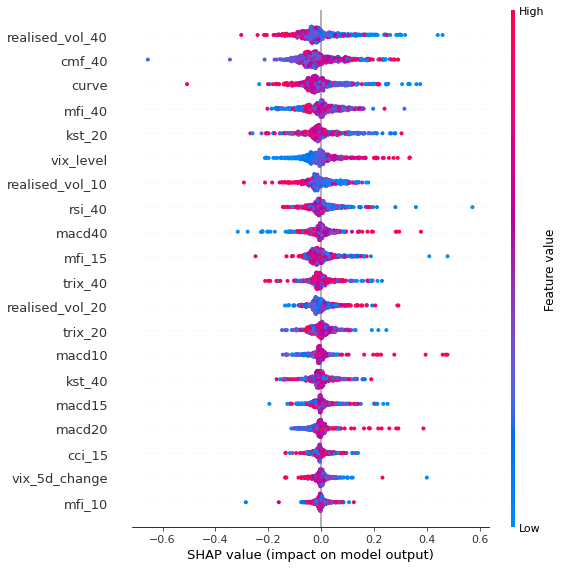

In [ ]:
shap.summary_plot(shap_values[1], X_test_new)

In [ ]:
pred=model.predict(X_test_new)
pred.argmax(axis=1)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(test_labels, pred.argmax(axis=1))

Confusion Matrix


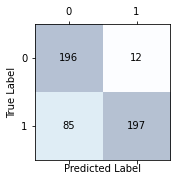

In [ ]:
print('Confusion Matrix')
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x=j,y=i,
            s=cm[i,j],
            va='center',ha='center')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=test_labels,y_pred=pred.argmax(axis=1)))

print('Recall: %.3f' % recall_score(y_true=test_labels,y_pred=pred.argmax(axis=1)))

print('F1: %.3f' % f1_score(y_true=test_labels,y_pred=pred.argmax(axis=1)))

Precision: 0.943
Recall: 0.699
F1: 0.802
